In [46]:
# VOY EJECUTANDO Y FERNANDO NOS VA EXPLICANDO EL EJEMPLO 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import random
from plotnine import ggplot, geom_point, aes, geom_abline

In [38]:
np.random.seed(42)
# datos de entrenamiento: 2100 numeros aleatorias de distribución normal
# con media cero y desviacion estandar 0.3
X_inliers = np.random.normal(0, 0.3, 200)
# Se convierte a 100 duplas para generar un scatter plot de 2 ejes
X_inliers = np.reshape(X_inliers, (-1, 2))
# Se concatenan, creando 200 duplas.
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
# Generacion de 20 duplas de outliers (10%) de números aleatorios entre -4 y 4
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# Se concatenan en la variable X
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
## Crea un arreglo de "unos" de la misma longitud que X
etiqueta = np.ones(len(X), dtype=int)
# Le asigna la etiqueta -1 a los outliers (los 20 ultimos)
etiqueta[-n_outliers:] = -1
etiqueta

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [45]:
# ajuste el modelo
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) # esto es para que identifique un 10% de datos outliers
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
y_pred = clf.fit_predict(X)
n_errors = (y_pred != etiqueta).sum()
X_scores = clf.negative_outlier_factor_ # El valor Local Outlier Factor (en este caso no hay umbral por que busca identificar el 10% de outliers)
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"


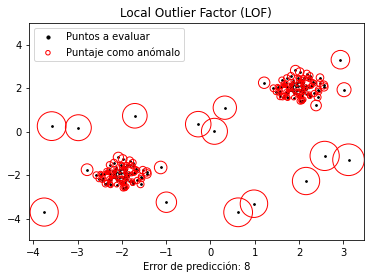

In [43]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos a evaluar')
# los circulos son proporcionales al puntaje de outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
facecolors='none', label='Puntaje como anómalo')
plt.axis('tight')
plt.ylim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("Error de predicción: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(etiqueta, y_pred)
cm

array([[ 17,   3],
       [  5, 195]])

Sin embargo, en la práctica desafortundamanete no tenemos etiquetas :( 
Los siguentes ejemplos son sin etiquetas.

In [ ]:
# Ejemplo iris

In [47]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length',
'petal_width', 'species']

In [49]:
clf = LocalOutlierFactor(n_neighbors = 5, novelty = False)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = iris_df[['sepal_length', 'sepal_width']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier_5 = lof_scores > 2
unique, counts = np.unique(outlier_5, return_counts=True)
unique, counts
lof_scores
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"

array([1.04065244, 1.04693845, 0.99666581, 1.09231647, 1.15501532,
       1.02705947, 1.11235314, 0.95857864, 1.1936053 , 1.00732885,
       1.25108715, 1.37121627, 0.8826962 , 1.20785736, 1.20302214,
       1.47956634, 1.02705947, 1.04065244, 1.09518172, 1.11580787,
       1.31776622, 1.1789288 , 1.38549431, 1.20393785, 1.37121627,
       1.07487954, 0.95857864, 1.14827183, 1.16251649, 0.99666581,
       1.03351818, 1.31776622, 1.19492345, 1.09461963, 1.00732885,
       1.10977831, 1.33004091, 1.47154987, 1.12651288, 0.91045695,
       0.91422713, 1.18568923, 1.0278073 , 0.91422713, 1.11580787,
       0.8826962 , 1.11580787, 1.03327614, 1.14784524, 1.1236453 ,
       1.04291544, 0.91486101, 0.99356122, 1.12532437, 0.98755528,
       1.05686518, 1.03835993, 1.07750527, 1.01327046, 1.62783685,
       1.31753232, 1.17028278, 1.32617591, 1.0343497 , 1.031543  ,
       0.97511055, 1.08078548, 0.95627191, 1.20829062, 1.07295727,
       1.43285892, 0.9776265 , 1.31092784, 0.9776265 , 0.97511

In [51]:
clf = LocalOutlierFactor(n_neighbors = 15, novelty = False)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = iris_df[['sepal_length', 'sepal_width']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier_15 = (lof_scores > 2)+0
unique, counts = np.unique(outlier_15, return_counts=True)
unique, counts
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"
outlier_15

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
iris_df['outlier_15'] = outlier_15

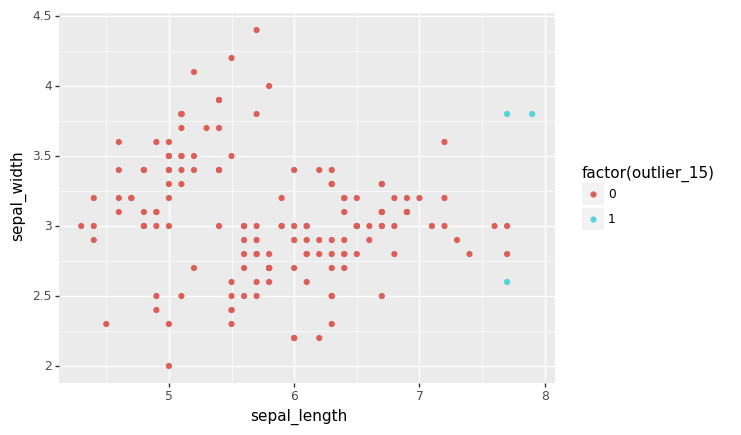

<ggplot: (8759328185997)>

In [53]:
(ggplot(iris_df, aes('sepal_length', 'sepal_width', color = 'factor(outlier_15)'))
+ geom_point())

Árboles de decisión

In [15]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('medidas_cuerpo2.csv')
df.head(6)

,ID,Peso,Sexo,Estatura,circun_cuello,circun_muneca
0,1,47.6,F,1.57,29.5,13.9
1,2,68.1,M,1.66,38.4,16.0
2,3,68.0,M,1.90,36.5,16.6
3,4,80.0,M,1.76,38.0,17.1
4,5,68.1,M,1.83,38.0,17.1
5,6,56.1,F,1.66,33.0,14.7


In [17]:
model=IsolationForest(n_estimators = 50, max_samples = 'auto', \
contamination = float(0.1), max_features = 1.0)
model.fit(df[['Peso']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [18]:
df['puntaje'] = model.decision_function(df[['Peso']])
df['anomalo'] = model.predict(df[['Peso']])
df[["Peso", "puntaje", "anomalo"]].head(6)

,Peso,puntaje,anomalo
0,47.6,0.003558,1
1,68.1,0.181116,1
2,68.0,0.179215,1
3,80.0,-0.003558,-1
4,68.1,0.181116,1
5,56.1,0.113067,1


In [19]:
anomalia = df.loc[df['anomalo'] == -1]
anomalia_index = list(anomalia.index)
print(anomalia)

    ID   Peso Sexo  Estatura  circun_cuello  circun_muneca   puntaje  anomalo
3    4   80.0    M      1.76           38.0           17.1 -0.003558       -1
10  11  102.2    M      1.79           41.5           17.1 -0.243520       -1
11  12   46.7    F      1.49           31.5           13.8 -0.045535       -1


In [21]:
df = pd.read_csv('PimaIndiansDiabetes.csv', index_col=[0])
df.head(6)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
6,5,116.0,74.0,NaN,NaN,25.6,0.201,30,neg


In [22]:
df[['diabetes']] = np.where(df['diabetes'].str.contains("pos"), 1, 0)
df.head(6)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [23]:
# Se elimina la etiqueta que no interesa
# X = df.iloc[:,:-1]
X = df
# Sólo datos completos, sin NaN
X.dropna(axis = 0, how = 'any', inplace = True)
X.head(6)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
15,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1


In [25]:
model = IsolationForest(max_samples = 100) # Puede colocarse como parámetro contamination = valor
X_matrix = X.values.reshape(-1, 9) # Número de features
len(X_matrix) # filas

392

In [ ]:
model = IsolationForest(max_samples = 100) # Puede colocarse como parámetro contamination = valor
X_matrix = X.values.reshape(-1, 9) # Número de features
len(X_matrix) # filas

In [26]:
model.fit(X_matrix)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [27]:
X['puntaje'] = model.decision_function(X_matrix)
X['anomalo'] = model.predict(X_matrix)

In [28]:
# anomalia = X.loc[X['anomalo'] == -1]
# df.loc[df['column_name'] == some_value]
anomalia = X[X['anomalo'] == -1]
anomalia_index = list(anomalia.index)
print(anomalia)

     pregnant  glucose  pressure  triceps  ...  age  diabetes   puntaje  anomalo
5           0    137.0      40.0     35.0  ...   33         1 -0.101543       -1
9           2    197.0      70.0     45.0  ...   53         1 -0.110101       -1
14          1    189.0      60.0     23.0  ...   59         1 -0.113951       -1
15          5    166.0      72.0     19.0  ...   51         1 -0.005179       -1
25         11    143.0      94.0     33.0  ...   51         1 -0.022556       -1
..        ...      ...       ...      ...  ...  ...       ...       ...      ...
745        13    153.0      88.0     37.0  ...   39         0 -0.078120       -1
746        12    100.0      84.0     33.0  ...   46         0 -0.014136       -1
748         1     81.0      74.0     41.0  ...   32         0 -0.030475       -1
754         0    181.0      88.0     44.0  ...   26         1 -0.055841       -1
764        10    101.0      76.0     48.0  ...   63         0 -0.057911       -1

[90 rows x 11 columns]


**Ejercicio tarea medidas de Cuerpo (LOF)**

In [55]:
df = pd.read_csv('medidas_cuerpo2.csv')
df.head()

(26, 6)

In [62]:
clf = LocalOutlierFactor(n_neighbors = 3, novelty = False, contamination = 0.2)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = df[['Peso', 'Estatura',	'circun_cuello',	'circun_muneca']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier = (lof_scores > 2)+0
unique, counts = np.unique(outlier_15, return_counts=True)
unique, counts
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"
outlier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [63]:
df['outlier'] = outlier
df.head()

,ID,Peso,Sexo,Estatura,circun_cuello,circun_muneca,outlier
0,1,47.6,F,1.57,29.5,13.9,0
1,2,68.1,M,1.66,38.4,16.0,0
2,3,68.0,M,1.90,36.5,16.6,0
3,4,80.0,M,1.76,38.0,17.1,0
4,5,68.1,M,1.83,38.0,17.1,0


In [66]:
df.loc[df.outlier == 1]

,ID,Peso,Sexo,Estatura,circun_cuello,circun_muneca,outlier
10,11,102.2,M,1.79,41.5,17.1,1
